In [2]:
import ndjson
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import pandas as pd

In [14]:
ratings = []
reviews = []
summaries = []

with open("data/Video_Games_5.json", "r") as infile:
    reader = ndjson.reader(infile)
    errorCount = 0
    for review in reader:
        try:
            rating = review["overall"]
            reviewText = review["reviewText"]
            reviewSummary = review["summary"]
        except Exception as e:
            errorCount += 1
            continue
        
        # condition to filter the reviews
        if len(reviewText) > 5 and len(reviewSummary) > 3:
            ratings.append(rating)
            reviews.append(reviewText.replace('\n',' '))
            summaries.append(reviewSummary)
    print('Total errors found: ',errorCount)
    print('Total reviews: ',len(reviews))

Total errors found:  261
Total reviews:  478318


In [16]:
# Create a dataframe of the data.
ratingsDf = pd.DataFrame({'ratings':ratings, 'reviews':reviews, 'summaries':summaries})
ratingsDf.head(5)

,ratings,reviews,summaries
0,5.0,"This game is a bit hard to get the hang of, bu...",but when you do it's great.
1,4.0,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it"
2,3.0,ok game.,Three Stars
3,2.0,"found the game a bit too complicated, not what...",Two Stars
4,5.0,"great game, I love it and have played it since...",love this game


array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

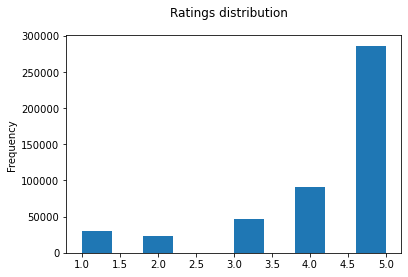

In [21]:
# histogram of ratings
#ratingsDf.ratings.hist()
ratingsDf.ratings.plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Ratings distribution')

In [37]:
# building the sampler
seed = 100
randomSampler = RandomUnderSampler(
    sampling_strategy={1.0: 1500, 2.0: 500, 3.0: 500, 4.0: 500, 5.0: 1500},
    random_state=seed,
)

indices = list(range(len(reviews)))
indices_small, ratings_sample = randomSampler.fit_resample(
    np.array(indices).reshape(-1, 1), ratingsDf.ratings
)

,ratings,reviews,summaries
0,1.0,Very poor effort. Everyone just jumping aroun...,Terrible
1,1.0,"This one of a bomb. Nothing worked properly, ...",The Pits
2,1.0,Give me a freakin break! I go in and buy a box...,"Good Game, Lousy distribution"
3,1.0,Dont buy this game . I love the ride at Disney...,Dont buy
4,1.0,"The clip doesn't hold it's position, so the ki...",Not worth the cost of shipping!


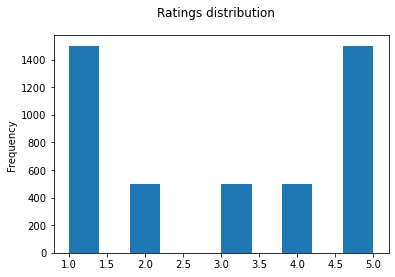

In [57]:
## build a small dataset
listOfsmallIndices = np.ndarray.flatten(indices_small).tolist()
smallSampleDf = ratingsDf.loc[listOfsmallIndices]
smallSample.ratings.plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Ratings distribution')
smallSample.head(5)

In [58]:
# build large dataset

## get indexes other than the ones used to build small dataset
largeDataIndexes = [index for index in ratingsDf.index if index not in listOfsmallIndices ]
remainingRatingsDf = ratingsDf.loc[largeDataIndexes]
print(remainingRatingsDf.ratings.count())

## Get randomized large dataset  from the remaining dataset
largeSampleIndices = np.random.randint(remainingRatingsDf.ratings.count(), size=100000)
langeSampleDf = ratingsDf.loc[largeSampleIndices.tolist()]

473818


In [61]:
# Store the dataset in files
with open("data/data-set/review_corpus_small.tsv", "w") as outfile:
    outfile.write(smallSampleDf.to_csv(index=False, sep="\t"))

with open("data/data-set/reviews_corpus_large.tsv", "w") as outfile:
    outfile.write(langeSampleDf.to_csv(index=False, sep="\t"))